squared euclidean distance
MSE
SSID

# Package installation

In [30]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 6.6 MB/s eta 0:00:0000:0100:01


In [65]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [166]:
!pip install scipy

In [167]:
import cv2
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import scipy


# Loading Noiseprints

In [192]:
with open('image_noise_prints.pickle', 'rb') as handle:
    im_np = pickle.load(handle)

In [193]:
len(im_np)

222

98.0

In [101]:
np_0 = im_np[list(im_np.keys())[0]]['noiseprint'].copy
np_1 = im_np[list(im_np.keys())[1]]['noiseprint'].copy
np_2 = im_np[list(im_np.keys())[2]]['noiseprint'].copy
np_3 = im_np[list(im_np.keys())[3]]['noiseprint'].copy
np_4 = im_np[list(im_np.keys())[4]]['noiseprint'].copy
np_5 = im_np[list(im_np.keys())[5]]['noiseprint'].copy
np_6 = im_np[list(im_np.keys())[6]]['noiseprint'].copy
np_7 = im_np[list(im_np.keys())[7]]['noiseprint'].copy

# Image Dimension Analysis

Majority of images fall into two dimension ratios:
- 0.75 
- 0.5625

A few fall outside of this (images below) which are panoramic images taken on 'Nat_Old' phone. 
!["../Nat_Old/20180409_154622.jpg"](../Nat_Old/20180409_154622.jpg)
!["../Nat_Old_2/20170421_123311.jpg"](../Nat_Old/20180409_154622.jpg)

In [93]:
data = []
for i in range(len(im_np.keys())):
    max_dim = max(im_np[list(im_np.keys())[i]]['noiseprint'].shape[0], im_np[list(im_np.keys())[i]]['noiseprint'].shape[1])
    min_dim = min(im_np[list(im_np.keys())[i]]['noiseprint'].shape[0], im_np[list(im_np.keys())[i]]['noiseprint'].shape[1])
    data.append([list(im_np.keys())[i], min_dim, max_dim])
df = pd.DataFrame(data=data, columns=['image_name', 'dim0', 'dim1'])

In [94]:
df['dim_ratio'] = df['dim0'] / df['dim1']
df['image_category'] = df['image_name']
df['image_category'] = df['image_category'].str.split('_')
split_df = pd.DataFrame(df['image_category'].to_list(), columns = ['image_cat', 'date', 'image_number'])
df = pd.concat([df, split_df], axis=1)
df['image_cat'] = df.image_cat.str.replace('\d+', '')
df

/opt/anaconda3/envs/Nat_SPNandNoisePrint/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,image_name,dim0,dim1,dim_ratio,image_category,image_cat,date,image_number
0,NatOld_20180410_103810.jpg,2268,4032,0.562500,"[NatOld, 20180410, 103810.jpg]",NatOld,20180410,103810.jpg
1,NatOld_20180409_154622.jpg,3776,9712,0.388797,"[NatOld, 20180409, 154622.jpg]",NatOld,20180409,154622.jpg
2,NatOld_20180409_132214.jpg,3024,4032,0.750000,"[NatOld, 20180409, 132214.jpg]",NatOld,20180409,132214.jpg
3,NatOld_20180409_131447.jpg,2448,3264,0.750000,"[NatOld, 20180409, 131447.jpg]",NatOld,20180409,131447.jpg
4,NatOld_20180409_022438.jpg,3024,4032,0.750000,"[NatOld, 20180409, 022438.jpg]",NatOld,20180409,022438.jpg
...,...,...,...,...,...,...,...,...
116,iCloudPhotos_IMG_0737.HEIC,3024,4032,0.750000,"[iCloudPhotos, IMG, 0737.HEIC]",iCloudPhotos,IMG,0737.HEIC
117,iCloudPhotos_IMG_0808.HEIC,3024,4032,0.750000,"[iCloudPhotos, IMG, 0808.HEIC]",iCloudPhotos,IMG,0808.HEIC
118,iCloudPhotos_IMG_0760.HEIC,2316,3088,0.750000,"[iCloudPhotos, IMG, 0760.HEIC]",iCloudPhotos,IMG,0760.HEIC
119,iCloudPhotos_IMG_0696.JPG,1080,1920,0.562500,"[iCloudPhotos, IMG, 0696.JPG]",iCloudPhotos,IMG,0696.JPG


In [95]:
df.groupby(['image_cat', 'dim_ratio', 'dim0', 'dim1']).count()

image_name  image_category  date  \
image_cat    dim_ratio dim0 dim1                                     
NatNew       0.750000  3000 4000           3               3     3   
                       3468 4624          47              47    47   
NatOld       0.338369  1792 5296           1               1     1   
             0.388797  3776 9712           1               1     1   
             0.562500  2268 4032           7               7     7   
                       2988 5312           9               9     9   
             0.750000  2448 3264           1               1     1   
                       3024 4032          31              31    31   
iCloudPhotos 0.562500  1080 1920           2               2     2   
                       2160 3840           3               3     3   
             0.750000  2316 3088           3               3     3   
                       3024 4032          13              13    13   

                                  image_number  
image_cat    dim_ratio dim0 dim1                
NatNew       0.750000  3000 4000             3  
                       3468 4624            47  
NatOld       0.338369  1792 5296             1  
             0.388797  3776 9712             1  
             0.562500  2268 4032             7  
                       2988 5312             9  
             0.750000  2448 3264             1  
                       3024 4032            31  
iCloudPhotos 0.562500  1080 1920             2  
                       2160 3840             0  
             0.750000  2316 3088             3  
                       3024 4032            13

In [96]:
df.groupby(['dim_ratio']).count()

,image_name,dim0,dim1,image_category,image_cat,date,image_number
dim_ratio,,,,,,,
0.338369,1,1,1,1,1,1,1
0.388797,1,1,1,1,1,1,1
0.562500,21,21,21,21,21,21,18
0.750000,98,98,98,98,98,98,98


In [97]:
df.groupby(['dim_ratio', 'image_cat']).count()

image_name  dim0  dim1  image_category  date  \
dim_ratio image_cat                                                    
0.338369  NatOld                 1     1     1               1     1   
0.388797  NatOld                 1     1     1               1     1   
0.562500  NatOld                16    16    16              16    16   
          iCloudPhotos           5     5     5               5     5   
0.750000  NatNew                50    50    50              50    50   
          NatOld                32    32    32              32    32   
          iCloudPhotos          16    16    16              16    16   

                        image_number  
dim_ratio image_cat                   
0.338369  NatOld                   1  
0.388797  NatOld                   1  
0.562500  NatOld                  16  
          iCloudPhotos             2  
0.750000  NatNew                  50  
          NatOld                  32  
          iCloudPhotos            16

In [83]:
df[df['dim_ratio'] < 0.5]

,image_name,dim0,dim1,dim_ratio,image_category,image_cat,date,image_number
1,NatOld_20180409_154622.jpg,3776,9712,0.388797,"[NatOld, 20180409, 154622.jpg]",NatOld,20180409,154622.jpg
42,NatOld2_20170421_123311.jpg,1792,5296,0.338369,"[NatOld2, 20170421, 123311.jpg]",NatOld2,20170421,123311.jpg


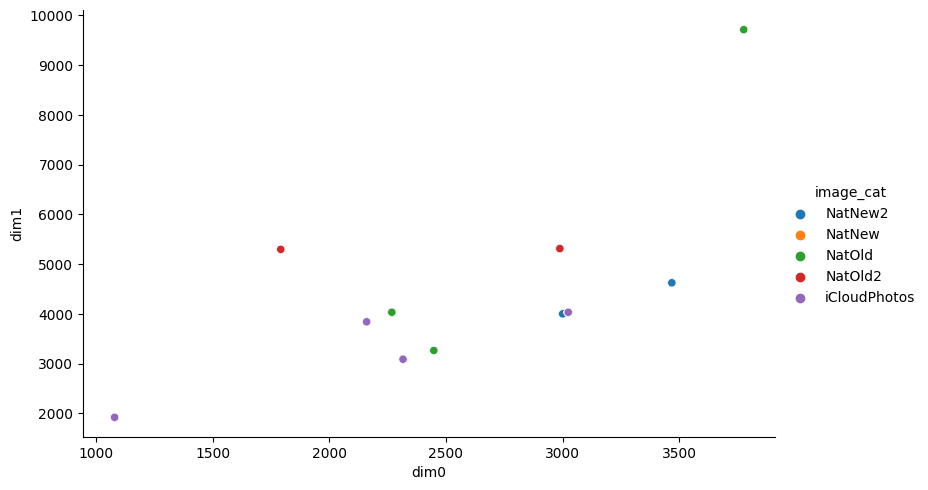

In [86]:
image_cat_list = set(df['image_cat'])
sns.relplot(data=df, x='dim0', y='dim1', hue='image_cat', hue_order=image_cat_list, aspect=1.61)
plt.show()


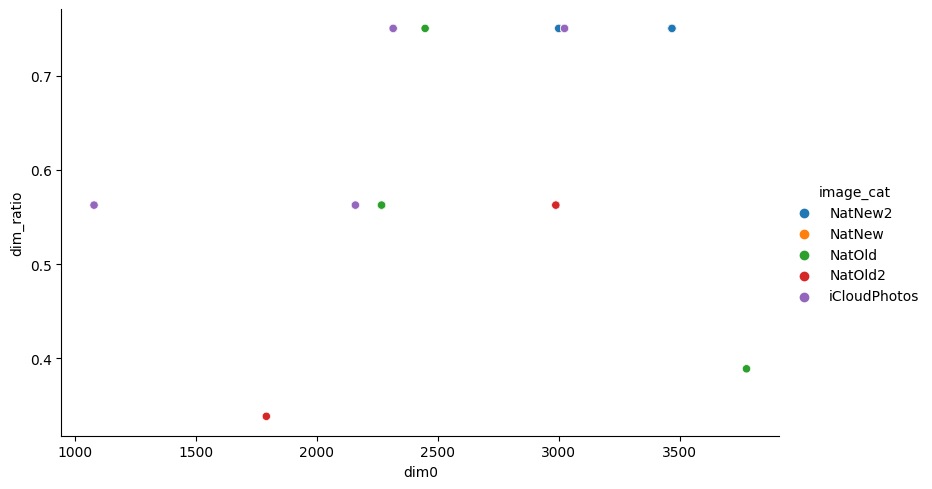

In [87]:
import seaborn as sns
image_cat_list = set(df['image_cat'])
sns.relplot(data=df, x='dim0', y='dim_ratio', hue='image_cat', hue_order=image_cat_list, aspect=1.61)
plt.show()


# Resize Images Testing

In [106]:
img1 = Image.open('../Nat_Old/20180410_103810.jpg')
img2 = Image.open('../Nat_Old/20180409_132214.jpg')

In [108]:
img1_resize = img1.resize(img2.size, Image.ANTIALIAS)

/opt/anaconda3/envs/Nat_SPNandNoisePrint/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """Entry point for launching an IPython kernel.


# Comparing same-sized arrays

In [116]:
df.groupby(['dim0', 'dim_ratio']).count()

,,image_name,dim1,image_category,image_cat,date,image_number
dim0,dim_ratio,,,,,,
1080,0.562500,2,2,2,2,2,2
1792,0.338369,1,1,1,1,1,1
2160,0.562500,3,3,3,3,3,0
2268,0.562500,7,7,7,7,7,7
2316,0.750000,3,3,3,3,3,3
2448,0.750000,1,1,1,1,1,1
2988,0.562500,9,9,9,9,9,9
3000,0.750000,3,3,3,3,3,3
3024,0.750000,44,44,44,44,44,44


In [120]:
df_3468 = df[(df['dim0'] == 3468) & (df['dim_ratio'] == 0.75)]
df_3024 = df[(df['dim0'] == 3024) & (df['dim_ratio'] == 0.75)]

In [140]:
df_3468.groupby('image_cat').count()

,image_name,dim0,dim1,dim_ratio,image_category,date,image_number
image_cat,,,,,,,
NatNew,47,47,47,47,47,47,47


In [141]:
df_3024.groupby('image_cat').count()

,image_name,dim0,dim1,dim_ratio,image_category,date,image_number
image_cat,,,,,,,
NatOld,31,31,31,31,31,31,31
iCloudPhotos,13,13,13,13,13,13,13


In [142]:
df_3024

,image_name,dim0,dim1,dim_ratio,image_category,image_cat,date,image_number
2,NatOld_20180409_132214.jpg,3024,4032,0.75,"[NatOld, 20180409, 132214.jpg]",NatOld,20180409,132214.jpg
4,NatOld_20180409_022438.jpg,3024,4032,0.75,"[NatOld, 20180409, 022438.jpg]",NatOld,20180409,022438.jpg
7,NatOld_20180408_193248.jpg,3024,4032,0.75,"[NatOld, 20180408, 193248.jpg]",NatOld,20180408,193248.jpg
8,NatOld_20180409_124115.jpg,3024,4032,0.75,"[NatOld, 20180409, 124115.jpg]",NatOld,20180409,124115.jpg
10,NatOld_20180409_141305.jpg,3024,4032,0.75,"[NatOld, 20180409, 141305.jpg]",NatOld,20180409,141305.jpg
11,NatOld_20180409_142630.jpg,3024,4032,0.75,"[NatOld, 20180409, 142630.jpg]",NatOld,20180409,142630.jpg
12,NatOld_20180404_082007.jpg,3024,4032,0.75,"[NatOld, 20180404, 082007.jpg]",NatOld,20180404,082007.jpg
13,NatOld_20180409_131422.jpg,3024,4032,0.75,"[NatOld, 20180409, 131422.jpg]",NatOld,20180409,131422.jpg
14,NatOld_20180409_124832.jpg,3024,4032,0.75,"[NatOld, 20180409, 124832.jpg]",NatOld,20180409,124832.jpg
15,NatOld_20180409_142627.jpg,3024,4032,0.75,"[NatOld, 20180409, 142627.jpg]",NatOld,20180409,142627.jpg


In [143]:
no_img1 = im_np['NatOld_20180404_200010.jpg']['noiseprint'].copy() # 98
no_img2 = im_np['NatOld_20180409_022430.jpg']['noiseprint'].copy() # 96
ic_img1 = im_np['iCloudPhotos_IMG_0769.HEIC']['noiseprint'].copy() # 200
ic_img2 = im_np['iCloudPhotos_IMG_0728.HEIC']['noiseprint'].copy() # 200

In [187]:
im = 'NatNew_20220913_141515.jpg'
im_np[im]['QF']

98.0

In [144]:
nn_img1 = im_np['NatNew_20220913_115546.jpg']['noiseprint'].copy() #99
nn_img2 = im_np['NatNew_20220913_141515.jpg']['noiseprint'].copy() #98

In [145]:
import numpy as np
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [148]:
print('nn 1:2 comp\nmse: ', mse(nn_img1, nn_img2), '\nssim: ', ssim(nn_img1, nn_img2))
print('no 1:2 comp\nmse: ', mse(no_img1, no_img2), '\nssim: ', ssim(no_img1, no_img2))
print('ic 1:2 comp\nmse: ', mse(ic_img1, np.transpose(ic_img2)), '\nssim: ', ssim(ic_img1, np.transpose(ic_img2)))
print('ic 1: no1 comp\nmse: ', mse(ic_img1, no_img1), '\nssim: ', ssim(ic_img1, no_img1))

nn 1:2 comp
mse:  0.4720399627887768 
ssim:  0.05267804243794801
no 1:2 comp
mse:  0.5198019443892253 
ssim:  -0.027288139785670473
ic 1:2 comp
mse:  0.4746341545923436 
ssim:  -0.0069204003180447
ic 1: no1 comp
mse:  0.5284612869733466 
ssim:  0.00592160097141663


In [170]:
scipy.spatial.distance_matrix(ic_img1,np.transpose(ic_img2)).sum() / (ic_img1.shape[0] * ic_img1.shape[1])

33.10561400901541

In [173]:
scipy.spatial.distance_matrix(no_img1,no_img2).sum() / (no_img1.shape[0] * no_img1.shape[1])

37.65600011237004

In [174]:
scipy.spatial.distance_matrix(nn_img1,nn_img2).sum() / (nn_img1.shape[0] * nn_img1.shape[1])

39.68311385141712

In [175]:
scipy.spatial.distance_matrix(ic_img1, no_img1).sum() / (ic_img1.shape[0] * ic_img1.shape[1])

34.84408886511235

In [178]:
np.mean((ic_img1 - np.transpose(ic_img2)) **2)

0.47463423

In [188]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
# def main():
#      original = cv2.imread("original_image.png")
#      compressed = cv2.imread("compressed_image.png", 1)
#      value = PSNR(original, compressed)
#      print(f"PSNR value is {value} dB")
       
# if __name__ == "__main__":
#     main()

In [190]:
ic1_2 = PSNR(ic_img1, np.transpose(ic_img2))
no1_2 = PSNR(no_img1, no_img2)
nn1_2 = PSNR(nn_img1, nn_img2)
ic1_no1 = PSNR(no_img1, ic_img1) 

In [191]:
print(ic1_2,no1_2, nn1_2, ic1_no1)

51.36721304981773 50.972424361752566 51.391017533395924 50.90066847702727


In [164]:
dist = distance_matrix(ic_img1, np.transpose(ic_img2), squared=True)
dist.sum()/(ic_img1.shape[0] * ic_img1.shape[1])

1472.2153219122913

In [134]:
ssim(img1, img2)

0.05267804243794801

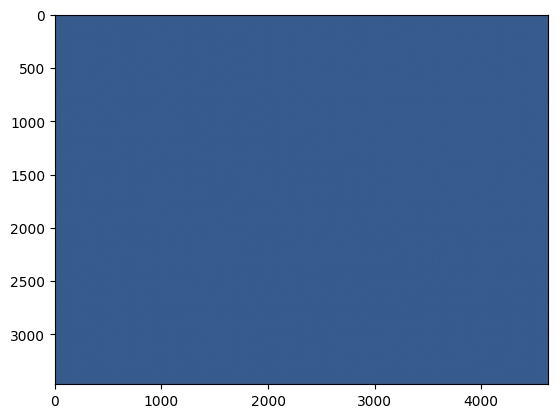

In [137]:
plt.imshow(img1, interpolation='nearest')
plt.show()

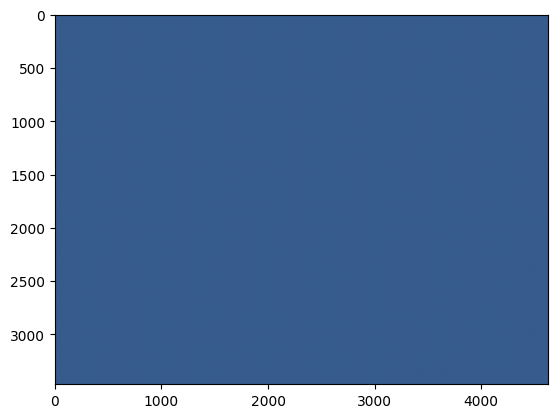

In [138]:
plt.imshow(img2, interpolation='nearest')
plt.show()